In [35]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import os
import numpy as np
import pandas as pd
import json
import cv2 as cv
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle
sns.set(style='darkgrid')
#sns.set(style='darkgrid', context='notebook',font_scale=1.25)

In [37]:
%autoreload
import sys
sys.path.insert(0,'../')
from scripts.loader import *
import mytools as tl

## Carga de datos

In [38]:
data_path = os.path.join('..', 'Datasets', 'Interiors')
resp_path = os.path.join(data_path, 'responses')
subj_path = os.path.join(data_path, 'human_scanpaths')

In [39]:
subjs = load_human_scanpaths(subj_path)

In [40]:
responses = pd.read_csv(os.path.join(resp_path, 'responses_data.csv')).set_index(['subj_id','image'])
responses.loc[22,'grayscale_11_opensource.jpg']

subj                          fac
response_x                    829
response_y                   1119
response_size                  11
response_time_click      2.366613
response_time_circle    24.016633
Name: (22, grayscale_11_opensource.jpg), dtype: object

In [41]:
trials_data = load_trials_properties(os.path.join(subj_path,'..', 'trials_properties.json'))
trials_data = pd.DataFrame(trials_data).set_index('image')
trials_data.head()

,target,dataset,target_matched_row,target_matched_column,target_height,target_width,image_height,image_width,initial_fixation_row,initial_fixation_column,target_object
image,,,,,,,,,,,
grayscale_1_housebeautiful.jpg,grayscale_1_housebeautiful_template_2.jpg,Interiors Dataset,155,130,72,72,768,1024,113,515,clock
grayscale_1_kitchen.jpg,grayscale_1_kitchen_template_1.jpg,Interiors Dataset,270,855,72,72,768,1024,620,718,bowl
grayscale_1_oliva.jpg,grayscale_1_oliva_template_1.jpg,Interiors Dataset,605,106,72,72,768,1024,718,492,cup
grayscale_1_opensource.jpg,grayscale_1_opensource_template_1.jpg,Interiors Dataset,376,700,72,72,768,1024,657,997,TBD
grayscale_2_housebeautiful.jpg,grayscale_2_housebeautiful_template_3.jpg,Interiors Dataset,499,447,72,72,768,1024,471,835,bowl


## Agregar las respuestas y chequeo de datos

In [42]:
# add responses
tl.add_responses(subj_path, resp_path)

subj_id: 41
file:  ../Datasets/Interiors/human_scanpaths/subj41_scanpaths.json
subj_id: 48
file:  ../Datasets/Interiors/human_scanpaths/subj48_scanpaths.json
subj_id: 51
file:  ../Datasets/Interiors/human_scanpaths/subj51_scanpaths.json
subj_id: 19
file:  ../Datasets/Interiors/human_scanpaths/subj19_scanpaths.json
subj_id: 22
file:  ../Datasets/Interiors/human_scanpaths/subj22_scanpaths.json
subj_id: 12
file:  ../Datasets/Interiors/human_scanpaths/subj12_scanpaths.json
subj_id: 20
file:  ../Datasets/Interiors/human_scanpaths/subj20_scanpaths.json
subj_id: 10
file:  ../Datasets/Interiors/human_scanpaths/subj10_scanpaths.json
subj_id: 17
file:  ../Datasets/Interiors/human_scanpaths/subj17_scanpaths.json
subj_id: 36
file:  ../Datasets/Interiors/human_scanpaths/subj36_scanpaths.json
subj_id: 42
file:  ../Datasets/Interiors/human_scanpaths/subj42_scanpaths.json
subj_id: 21
file:  ../Datasets/Interiors/human_scanpaths/subj21_scanpaths.json
subj_id: 23
file:  ../Datasets/Interiors/human_scanp

In [43]:
# carga de los sujetos con las respuestas almacenadas
subjs_response = load_human_scanpaths(os.path.join(resp_path, 'human_scanpaths'))
subjs_response[1]['grayscale_11_opensource.jpg']

{'subject': '01',
 'dataset': 'Interiors Dataset',
 'image_height': 768,
 'image_width': 1024,
 'screen_height': 960,
 'screen_width': 1280,
 'receptive_height': 32,
 'receptive_width': 32,
 'target_found': False,
 'target_bbox': [559, 228, 631, 300],
 'X': [623.5, 507.6, 367.4, 385.7, 656.6, 401.7, 349.8, 327.0],
 'Y': [758.9, 434.0, 338.6, 509.70000000000005, 407.4, 588.3, 557.3, 551.1],
 'T': [1449, 130, 244, 296, 396, 327, 360, 539],
 'target_object': 'TBD',
 'max_fixations': 13,
 'subject_name': 'AFR',
 'initial_fixation_row': 754,
 'initial_fixation_column': 585,
 'response_x': 463.0,
 'response_y': 258.0,
 'response_size': 17,
 'response_click': 9.40012257278431,
 'response_circle': 18.2170030085836,
 'distance_to_target': 132.13629327327143,
 'distance_to_last_fix': 323.1154747145361,
 'last_fix_dur': -1,
 'target_found_response': False,
 'delta_time_response': 8.81688043579929}

In [44]:
# algunos chequeos
tl.dimensions_check_scapaths(subj_path)

Dimesions are OK, X: columns, Y: rows


In [45]:
# dataframe de relevancia para explorar las respuestas
responses_data = tl.get_responses_features(subjs_response)
responses_data.head()

,subj,img,max_fixations,target_found,target_found_response,response_size,distance_to_target,distance_to_last_fix,delta_time_response,response_x,response_y,target_bbox_x,target_bbox_y
0,41,grayscale_11_opensource.jpg,13,False,False,29,311.313347,227.706988,49.599536,518.0,415.0,228,559
1,41,grayscale_18_housebeautiful.jpg,9,False,False,47,289.587638,428.953296,9.666707,552.0,506.0,797,400
2,41,grayscale_100_oliva.jpg,5,True,False,19,231.019480,660.175621,5.633140,746.0,186.0,713,381
3,41,grayscale_17_oliva.jpg,3,False,False,35,342.947518,348.891100,4.266648,465.0,284.0,186,490
4,41,grayscale_16_housebeautiful.jpg,3,False,False,19,601.838018,637.040941,2.900187,794.0,410.0,158,421


In [46]:
# TODO: identificar los sujetos que tienen respuestas fuera de los rangos de la imagen
print(responses_data[responses_data.response_x >= 1024].shape)
tiramos = responses_data[responses_data.response_x >= 1024][['subj','img']]
print(tiramos)
responses_data = responses_data[responses_data.response_x < 1024]
print(responses_data[responses_data.response_y >= 768].shape)

(10, 13)
      subj                       img
818     20     grayscale_4_oliva.jpg
853     20    grayscale_61_oliva.jpg
862     20   grayscale_7_kitchen.jpg
912     20    grayscale_92_oliva.jpg
1158    17    grayscale_74_oliva.jpg
2177    30     grayscale_2_oliva.jpg
4187    25  grayscale_15_kitchen.jpg
4231    25     grayscale_2_oliva.jpg
5656    50    grayscale_55_oliva.jpg
6819    45    grayscale_65_oliva.jpg
(0, 13)


In [47]:
# agrego centros de las bbox y y llevo todo al centro en cuanto a las respuestas
responses_data['response_target_relative_x'] = responses_data['target_bbox_x'] - responses_data['response_x']
responses_data['response_target_relative_y'] = responses_data['target_bbox_y'] - responses_data['response_y']
print('Width limits: ', responses_data['response_target_relative_x'].min(),
      responses_data['response_target_relative_x'].max())
print('Height limits: ',responses_data['response_target_relative_y'].min(),
      responses_data['response_target_relative_y'].max())

Width limits:  -1006.0 906.0
Height limits:  -570.0 614.0


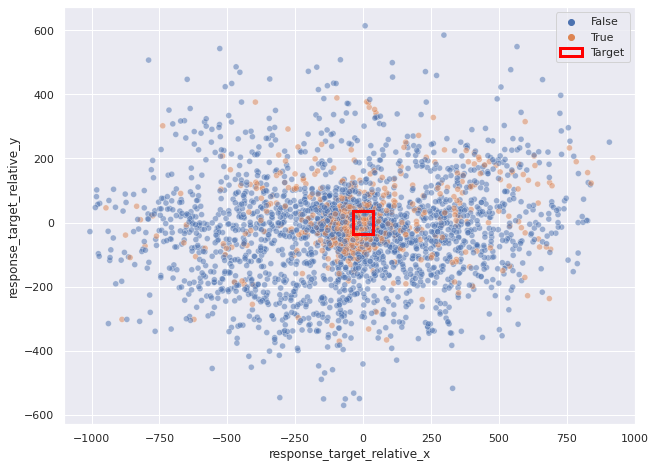

In [48]:
# all responses
fig, ax = plt.subplots(1,1, figsize=(10.24, 7.68))
sns.scatterplot(x='response_target_relative_x', y='response_target_relative_y',hue='target_found',
                data=responses_data, alpha=0.5, ax=ax);
ax.add_patch(Rectangle((-36,-36), 72, 72, fill=False, edgecolor='red', linewidth=3, label='Target'))
ax.legend();

(0.0, 400.0)

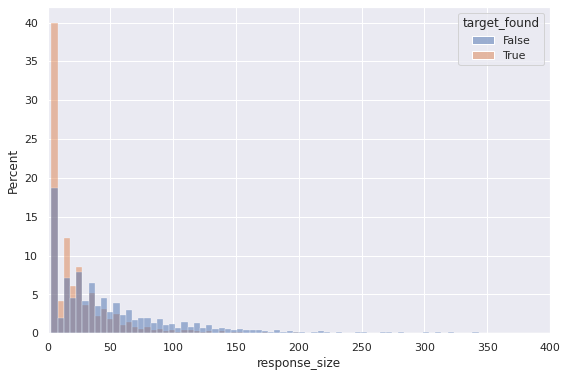

In [49]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
sns.histplot(x='response_size', hue='target_found', data=responses_data, ax=ax, stat='percent', common_norm=False);
ax.set_xlim(0,400)

Text(0.5, 1.0, 'Not found: 3546')

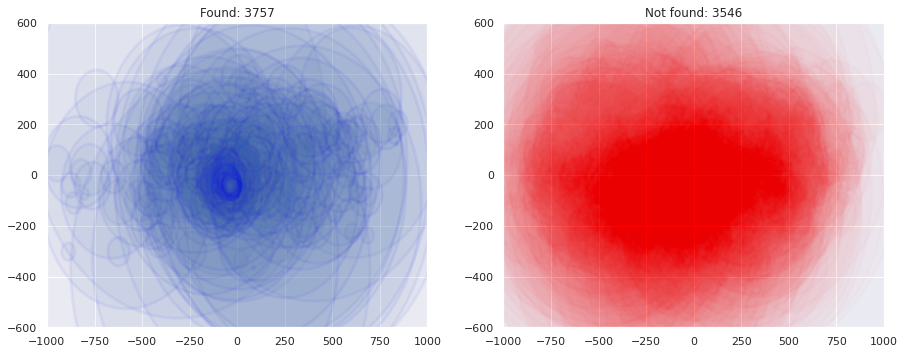

In [50]:
# all responses
fig, ax = plt.subplots(1,2,figsize=(15,10))
n_found , n_not_found = 0, 0
for idx, row in responses_data.iterrows():
    rx = row.response_target_relative_x
    ry = row.response_target_relative_y
    r = row.response_size
    if row.target_found:
        ax[0].add_patch(Circle((rx,ry), r, fill=True, edgecolor='blue', linewidth=3, alpha=0.05))
        n_found += 1
    else:
        ax[1].add_patch(Circle((rx,ry), r, fill=True, facecolor='red', edgecolor='red', linewidth=3, alpha=0.01))
        n_not_found += 1
        
ax[0].set_xlim(-1000, 1000)
ax[0].set_ylim(-600, 600)
ax[0].set_aspect(1024/768)
ax[0].set_title(f'Found: {n_found}')
ax[1].set_xlim(-1000, 1000)
ax[1].set_ylim(-600, 600)
ax[1].set_aspect(1024/768)
ax[1].set_title(f'Not found: {n_not_found}')

In [51]:
subjs_response[41]['grayscale_100_oliva.jpg']

{'subject': '41',
 'dataset': 'Interiors Dataset',
 'image_height': 768,
 'image_width': 1024,
 'screen_height': 960,
 'screen_width': 1280,
 'receptive_height': 32,
 'receptive_width': 32,
 'target_found': True,
 'target_bbox': [381, 713, 453, 785],
 'X': [398.5, 493.4, 758.7],
 'Y': [365.1, 374.5, 417.6],
 'T': [1818, 233, 222],
 'target_object': 'potted plant',
 'max_fixations': 5,
 'subject_name': 'mar',
 'initial_fixation_row': 339,
 'initial_fixation_column': 400,
 'response_x': 186.0,
 'response_y': 746.0,
 'response_size': 19,
 'response_click': 1.88357193919364,
 'response_circle': 7.51671208883636,
 'distance_to_target': 231.01947969814148,
 'distance_to_last_fix': 660.1756205737986,
 'last_fix_dur': -1,
 'target_found_response': False,
 'delta_time_response': 5.63314014964272}

In [52]:
subj = 41
#image_name = 'grayscale_100_oliva.jpg' 
image_name='grayscale_11_opensource.jpg'
subjs[subj][image_name]['target_bbox'][:2]

[559, 228]

(<Figure size 1080x720 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

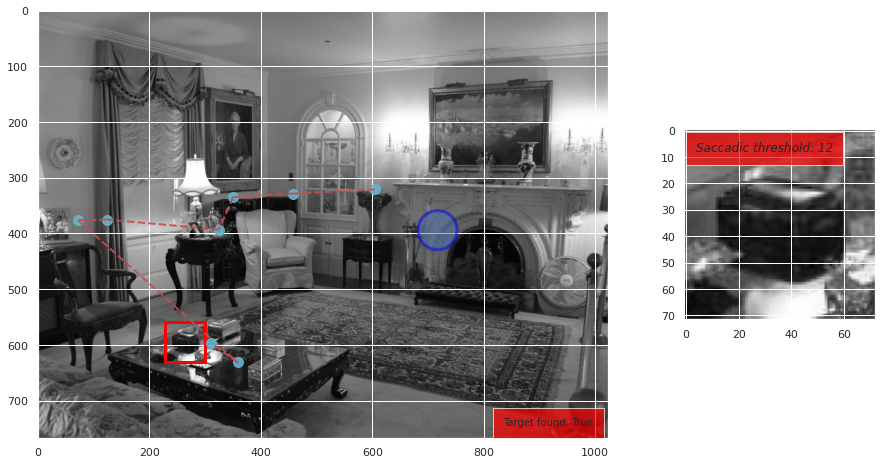

In [53]:
%autoreload
import mytools as tl
tl.plot_trial_subject_response(subj=40, 
                               image_name=image_name,
                               data_path=data_path,
                               resp_path=resp_path,
                               y_correction = False,
                               show_scanpath=True)

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

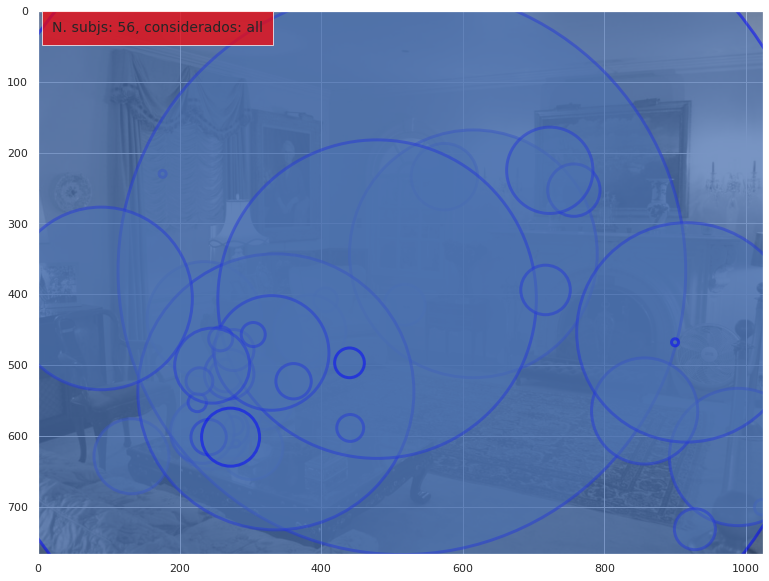

In [54]:
%autoreload
import mytools as tl
tl.plot_image_responses(image_name=image_name,
                        data_path=data_path,
                        resp_path=resp_path,
                        y_correction = False)

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

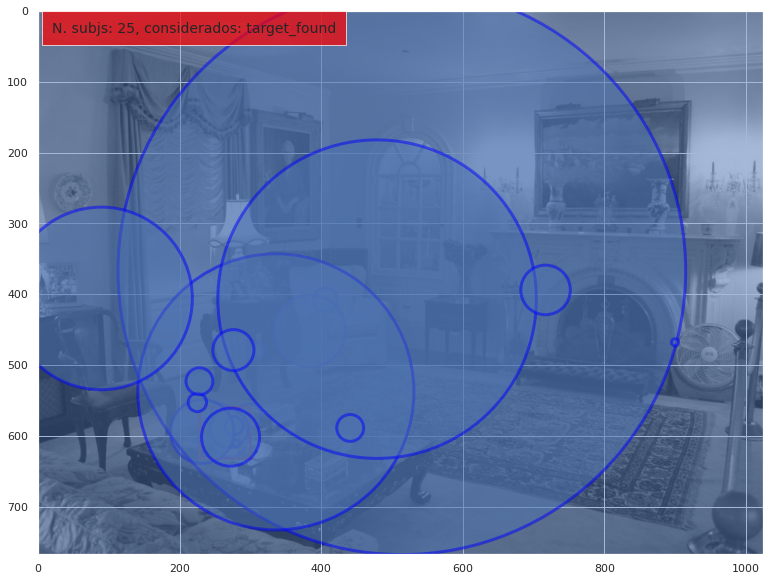

In [55]:
import mytools as tl
tl.plot_image_responses(image_name=image_name,
                        data_path=data_path,
                        resp_path=resp_path,
                        y_correction = False,
                        use='target_found')

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

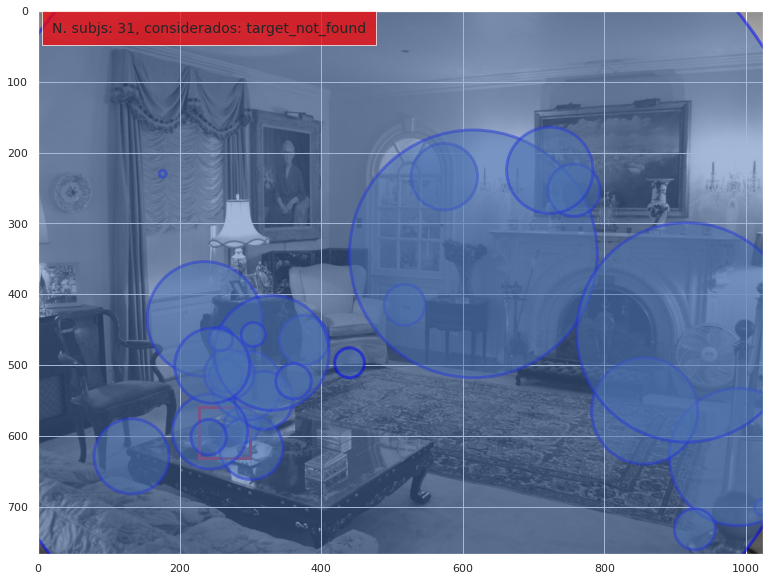

In [56]:
import mytools as tl
tl.plot_image_responses(image_name=image_name,
                        data_path=data_path,
                        resp_path=resp_path,
                        y_correction = False,
                        use='target_not_found')

## Análisis de los targets encontrados online vs. respuesta subjetiva

In [57]:
sns.set_context(context='notebook', font_scale=1.1)

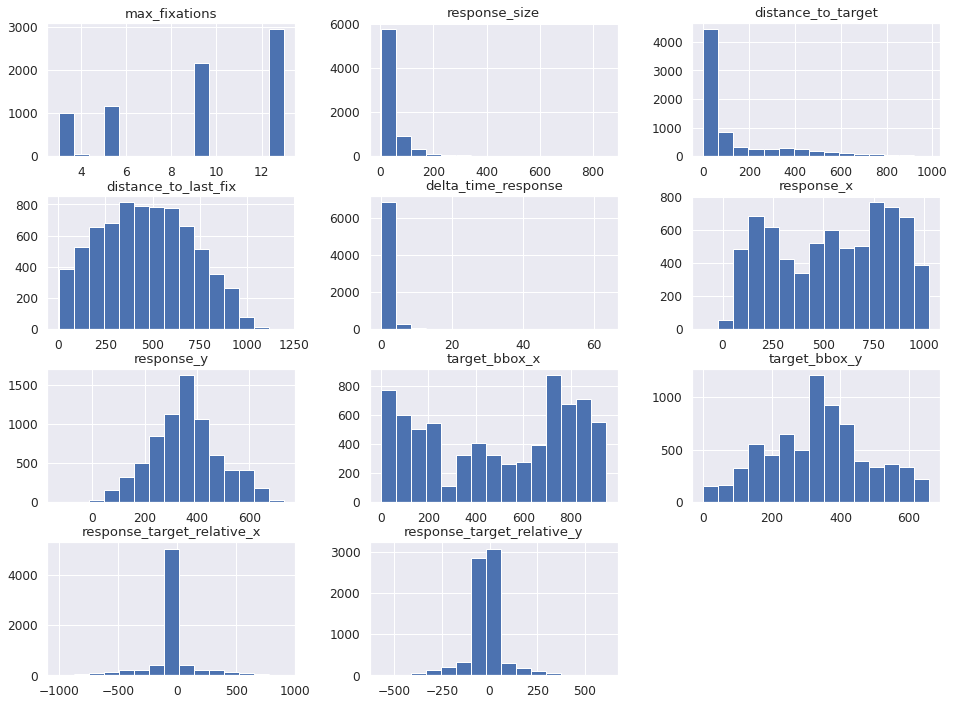

In [58]:
# Histogramas exploratorios
responses_data.loc[:,responses_data.columns!='subj'].hist(figsize=(16,12), bins=15);

In [59]:
responses_data.columns

Index(['subj', 'img', 'max_fixations', 'target_found', 'target_found_response',
       'response_size', 'distance_to_target', 'distance_to_last_fix',
       'delta_time_response', 'response_x', 'response_y', 'target_bbox_x',
       'target_bbox_y', 'response_target_relative_x',
       'response_target_relative_y'],
      dtype='object')

In [60]:
# Veamos que paso con los que tienen 4 max_fix (probablemente los impute como 5)
print(responses_data[responses_data.max_fixations==4].shape[0])
print('Sujetos con este problema:', list(responses_data[responses_data.max_fixations==4].subj.unique())) 
responses_data[responses_data.max_fixations==4][['subj','img']].sample(5)

54
Sujetos con este problema: [37, 29]


,subj,img
7183,29,grayscale_85_oliva.jpg
4725,37,grayscale_20_housebeautiful.jpg
4662,37,grayscale_64_oliva.jpg
4705,37,grayscale_1_kitchen.jpg
7122,29,grayscale_20_opensource.jpg


In [61]:
# SOLO POR AHORA VOY A CORREGIR SUPONIENDO QUE DEBERIA SER 5 FIJACIONES/4 SACADAS
#subjs[37]['grayscale_30_opensource.jpg']
responses_data['max_fix_corr'] = responses_data['max_fixations'].replace(4, 5)

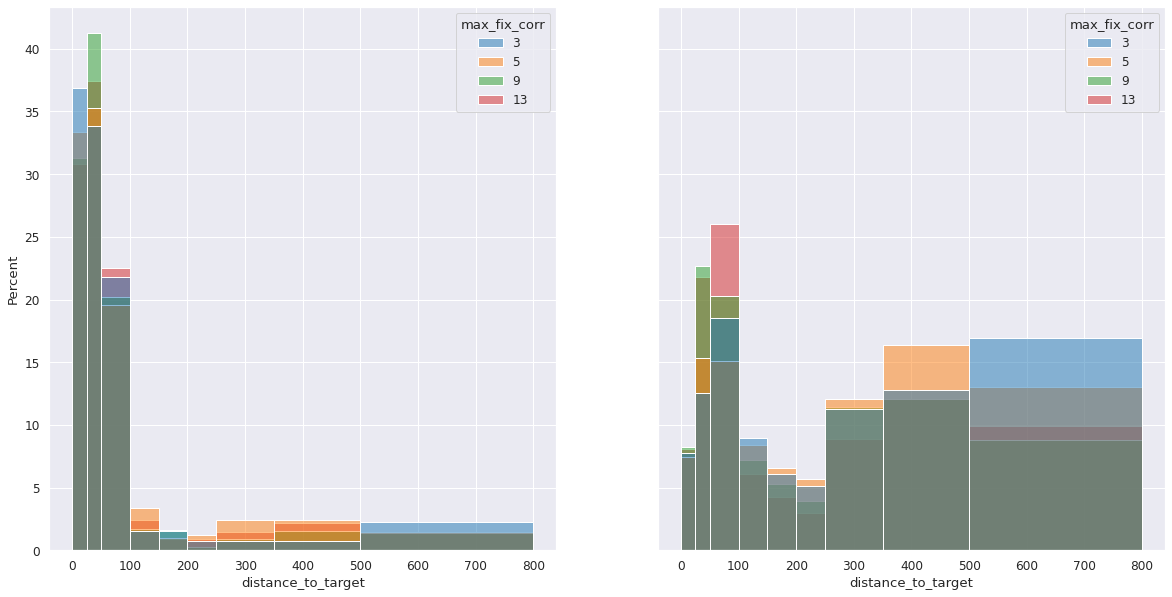

In [62]:
# Agrupemos por max fixations y veamos que pasa con las respuestas segun la cantidad de sacadas permitidas

bins = np.array([0,25,50,100,150,200,250,350,500,800])
palette = sns.color_palette('tab10',4)
_, ax = plt.subplots(1,2, figsize=(20,10), sharey=True)

sns.histplot(x='distance_to_target',hue= 'max_fix_corr',data=responses_data[responses_data.target_found],
                bins = bins, palette=palette, ax=ax[0], stat='percent', common_norm=False);
sns.histplot(x='distance_to_target',hue= 'max_fix_corr',data=responses_data[~responses_data.target_found],
                bins = bins, palette=palette, ax=ax[1], stat='percent', common_norm=False);


<AxesSubplot:xlabel='max_fix_corr', ylabel='distance_to_target'>

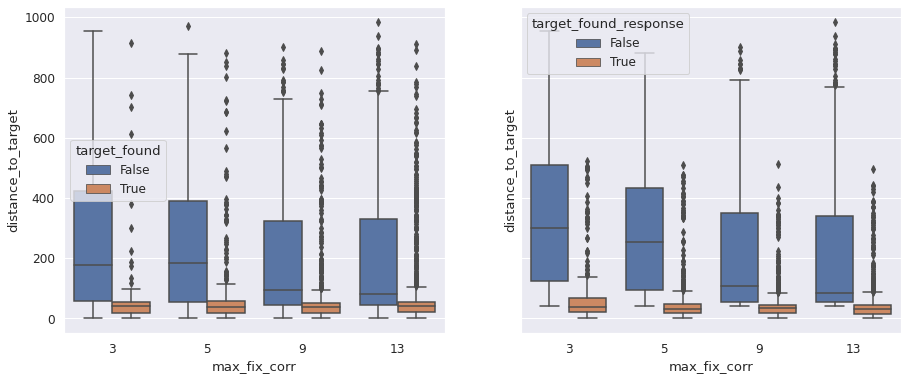

In [72]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(15,6))

sns.boxplot(x='max_fix_corr',
            y='distance_to_target',
            hue='target_found',
            data=responses_data,
            ax=ax[0]
            )

sns.boxplot(x='max_fix_corr',
            y='distance_to_target',
            hue='target_found_response',
            data=responses_data,
            ax=ax[1]
            )

<AxesSubplot:xlabel='max_fix_corr', ylabel='response_size'>

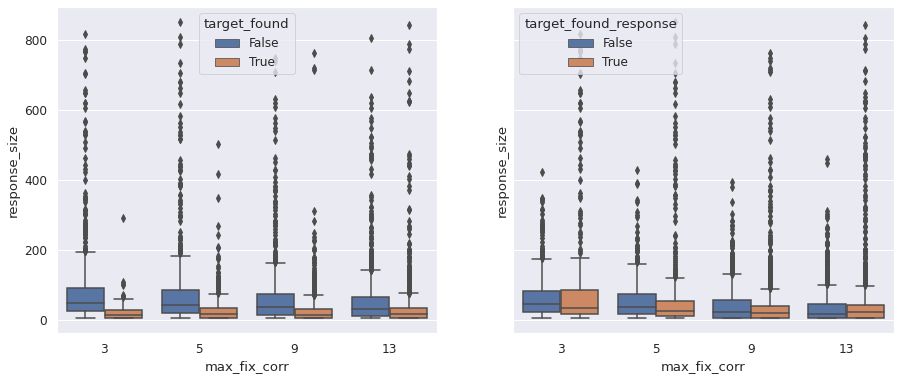

In [73]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(15,6))

sns.boxplot(x='max_fix_corr',
            y='response_size',
            hue='target_found',
            data=responses_data,
            ax=ax[0]
            )

sns.boxplot(x='max_fix_corr',
            y='response_size',
            hue='target_found_response',
            data=responses_data,
            ax=ax[1]
            )

<AxesSubplot:xlabel='max_fix_corr', ylabel='distance_to_last_fix'>

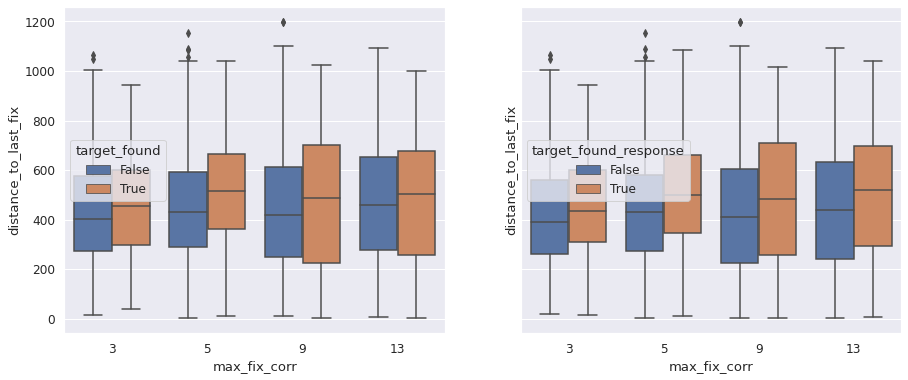

In [74]:
_,ax=plt.subplots(1,2, sharey=True, figsize=(15,6))

sns.boxplot(x='max_fix_corr',
            y='distance_to_last_fix',
            hue='target_found',
            data=responses_data,
            ax=ax[0]
            )

sns.boxplot(x='max_fix_corr',
            y='distance_to_last_fix',
            hue='target_found_response',
            data=responses_data,
            ax=ax[1]
            )

In [64]:
print('Total de trials donde se encontró el target online:',responses_data.target_found.sum())

print('Total de trials donde se encontró el target en respuesta:', 
        responses_data.target_found_response.sum())

print('Total de trials con target found online y respuesta:',
        responses_data[(responses_data.target_found) & (responses_data.target_found_response)].shape[0])
        
print('Total de trials con target found online pero que no acertaron en respuesta:',
        responses_data[(responses_data.target_found) & ~(responses_data.target_found_response)].shape[0])


Total de trials donde se encontró el target online: 3757
Total de trials donde se encontró el target en respuesta: 3922
Total de trials con target found online y respuesta: 2644
Total de trials con target found online pero que no acertaron en respuesta: 1113


### Online found y respuesta not found
La pregunta aca es si encontraron realmente el target en estos casos. Una cosa que podemos usar es el tiempo de fijación en el cual observaron el target

<AxesSubplot:xlabel='max_fix_corr', ylabel='distance_to_target'>

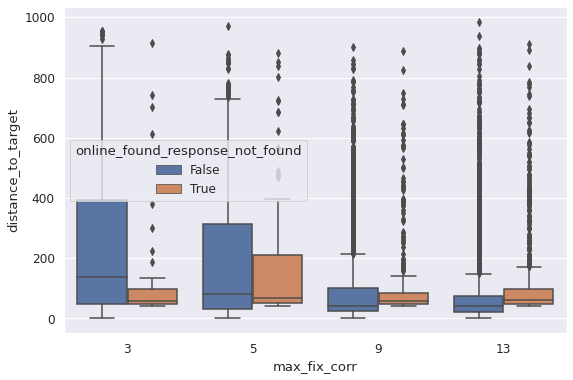

In [65]:
# Analicemos los sujetos que se supone que vieron el target pero en la respuesta no lo vieron

online_found_response_not_found = responses_data.target_found & ~responses_data.target_found_response
responses_data['online_found_response_not_found'] = online_found_response_not_found

_,ax=plt.subplots(1,1, figsize=(9,6))

# Boxplot de los casos encontrados online pero no con la respuesta
sns.boxplot(x='max_fix_corr',
            y='distance_to_target',
            hue='online_found_response_not_found',
            data=responses_data,
            ax=ax
            )


<AxesSubplot:xlabel='max_fix_corr', ylabel='distance_to_target'>

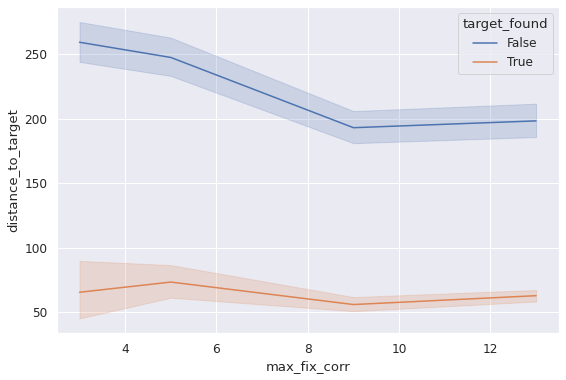

In [66]:
_,ax=plt.subplots(1,1, figsize=(9,6))

sns.lineplot(x='max_fix_corr',
            y='distance_to_target',
            #hue='online_found_response_not_found',
            hue='target_found',
            data=responses_data,
            ax=ax
            )

<AxesSubplot:xlabel='max_fix_corr', ylabel='response_size'>

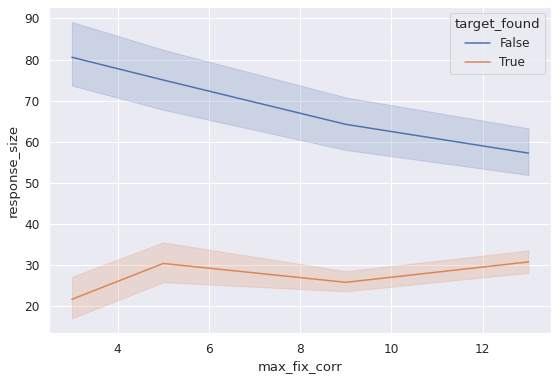

In [67]:
_,ax=plt.subplots(1,1, figsize=(9,6))
sns.lineplot(x='max_fix_corr',
            y='response_size',
            #hue='online_found_response_not_found',
            hue='target_found',
            data=responses_data,
            ax=ax
            )

<AxesSubplot:xlabel='max_fix_corr', ylabel='distance_to_last_fix'>

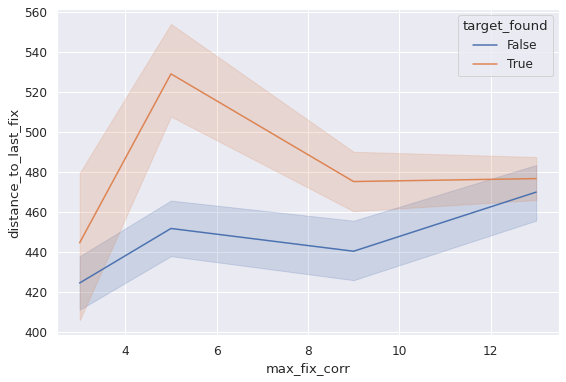

In [68]:
_,ax=plt.subplots(1,1, figsize=(9,6))
sns.lineplot(x='max_fix_corr',
            y='distance_to_last_fix',
            #hue='online_found_response_not_found',
            hue='target_found',
            data=responses_data,
            ax=ax
            )